<a href="https://colab.research.google.com/github/Vetyugov/ML/blob/master/Iris_Classifier_sklearn_LinearDiscriminantAnalysis_and_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler

# Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

# Оставьте два признака - sepal_length и sepal_width и целевую переменную

In [ ]:
data = data.drop('petal length (cm)', axis = 1)
data = data.drop('petal width (cm)', axis = 1)

In [ ]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Разделите данные на выборку для обучения и тестирования

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [ ]:
len(y_test)

38

# Постройте модель LDA

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


# Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).

In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]

In [ ]:
X_train[['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
4,5.0,3.6
32,5.2,4.1
142,5.8,2.7
85,6.0,3.4
86,6.7,3.1
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


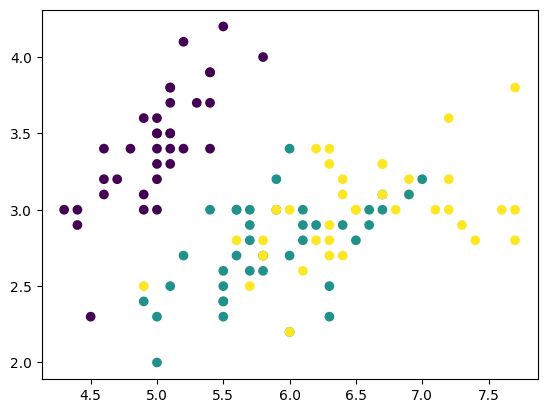

In [ ]:
plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)

plt.show()

In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
plt.show()

<ipython-input-34-5f7bd2bfae2b>:6: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


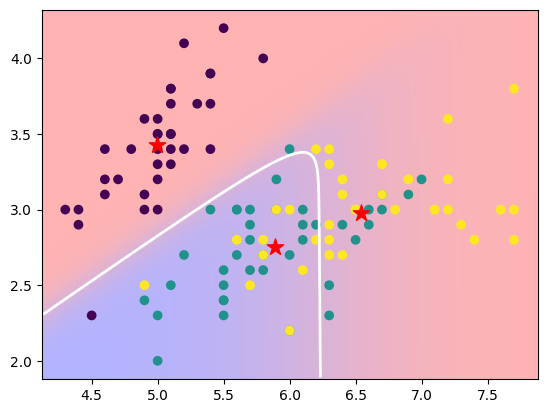

In [ ]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


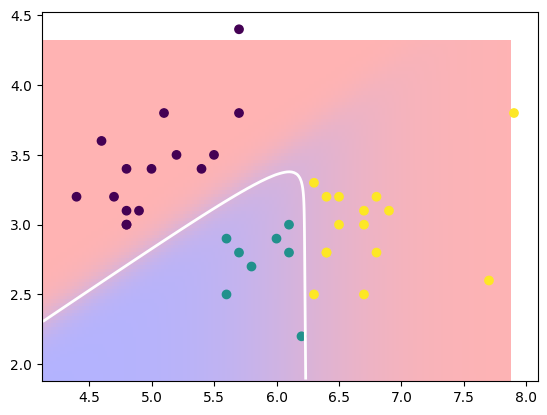

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lda_small.predict(small_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [ ]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

# Для задачи классификации после построения модели посчитайте метрику accuracy, она должна быть больше 0.7 (ВЫПОЛНЕНО)


In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.868421052631579

In [ ]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [ ]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA:
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(small_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(small_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(small_test)

array([[2.38318259e-02, 5.39569918e-01, 4.36598256e-01],
       [7.11056563e-01, 1.28646086e-01, 1.60297351e-01],
       [2.58701455e-05, 1.58881246e-01, 8.41092884e-01],
       [4.60276708e-02, 5.35393890e-01, 4.18578439e-01],
       [1.73706586e-03, 3.32783951e-01, 6.65478983e-01],
       [6.73659907e-01, 2.06738542e-01, 1.19601551e-01],
       [1.65740832e-01, 5.68996052e-01, 2.65263116e-01],
       [2.81452331e-03, 2.47752254e-01, 7.49433223e-01],
       [2.44866688e-03, 6.55794505e-01, 3.41756828e-01],
       [4.87774735e-02, 6.34411490e-01, 3.16811037e-01],
       [1.81738012e-02, 3.29110344e-01, 6.52715855e-01],
       [8.02288177e-01, 1.67231642e-01, 3.04801811e-02],
       [6.66531987e-01, 1.93443028e-01, 1.40024985e-01],
       [8.05101962e-01, 1.58704881e-01, 3.61931567e-02],
       [9.56340388e-01, 2.77423289e-02, 1.59172831e-02],
       [5.15333830e-02, 3.53390399e-01, 5.95076218e-01],
       [1.00587209e-02, 3.74906683e-01, 6.15034596e-01],
       [4.95500397e-02, 7.20598

In [ ]:
accuracy_score(y_test, lr.predict(small_test))

0.8421052631578947

In [ ]:
lr.coef_

array([[-2.46469701,  2.08983797],
       [ 0.58608244, -1.51928758],
       [ 1.87861458, -0.57055038]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


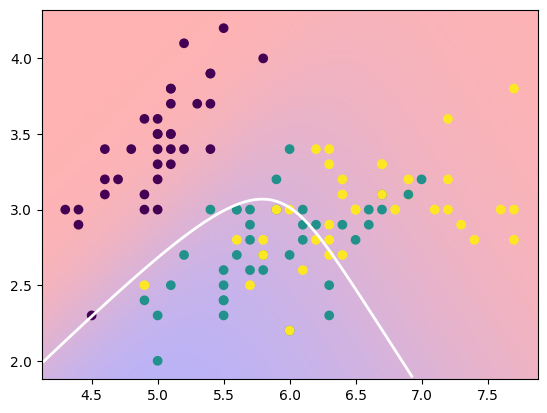

In [ ]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


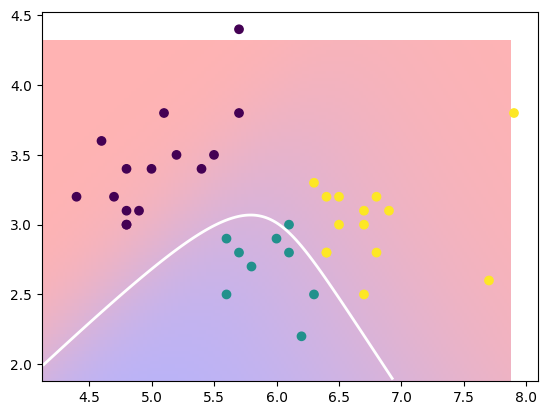

In [ ]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lr.predict(small_test))

nx, ny = 200, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [ ]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [ ]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [ ]:
X

array([[ -8.36392241,  -0.55531818],
       [  3.03881863,  -9.93391063],
       [  0.0593924 ,  -9.82477048],
       [  1.22392662,  -9.55775337],
       [  4.25945114, -12.77037723],
       [  2.74947776,  -5.31765357],
       [ -4.3007973 ,   1.66747822],
       [  0.19685564,  -8.21285844],
       [  2.85115246, -13.23735981],
       [ -4.97146307,   6.96823882],
       [ -0.38529179,   4.01454648],
       [ -0.48031732,  -8.13875249],
       [ -2.53937947,   6.67710338],
       [ -3.04723157,   3.53431937],
       [  0.66663056,  -9.08795209],
       [ -4.42081553,   5.92826747],
       [  1.84208797,  -6.08264975],
       [  0.7271317 ,  -6.27547537],
       [ -5.05615926,   9.00022971],
       [  2.03761251,  -6.30099233],
       [ -6.20518279,  10.96612937],
       [  4.77304512,  -5.27618608],
       [  5.31089492, -13.11959246],
       [  0.17545262,  -6.72979747],
       [  5.9121724 ,  -7.19079778],
       [ -1.68783867,   5.40426897],
       [ -0.64194994,  -8.21383373],
 

<ipython-input-55-a3a6361253ac>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)


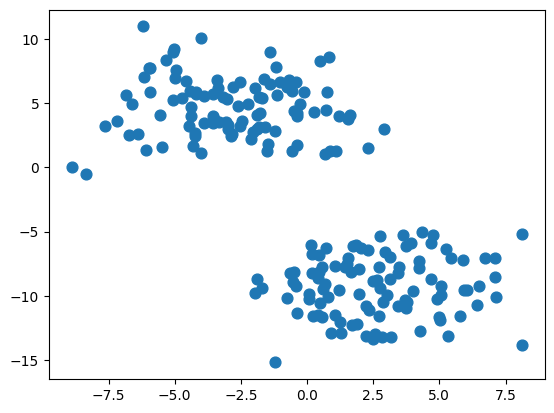

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

999
3
9
0


In [ ]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 0.14875471],
       [ 1.55875199],
       [-0.55624393],
       [ 1.55875199],
       [ 0.85375335],
       [-0.20374461],
       [ 0.14875471],
       [-1.61374188],
       [-1.61374188],
       [-1.61374188],
       [-0.90874325],
       [ 1.55875199],
       [-0.20374461],
       [-0.90874325],
       [ 1.55875199],
       [-0.90874325],
       [ 0.50125403],
       [-0.55624393],
       [-1.26124256],
       [-0.20374461],
       [ 0.14875471],
       [-1.26124256],
       [ 0.50125403],
       [ 1.20625267],
       [-1.26124256],
       [-1.61374188],
       [ 0.50125403],
       [ 1.55875199],
       [ 1.55875199],
       [ 1.20625267],
       [-1.61374188],
       [-1.61374188],
       [-0.20374461],
       [ 0.50125403],
       [-0.55624393],
       [-0.90874325],
       [-0.20374461],
       [ 0.85375335],
       [ 0.14875471],
       [ 0.85375335],
       [ 1.55875199],
       [ 0.50125403],
       [-0.20374461],
       [-0.20374461],
       [ 1.20625267],
       [ 1

In [ ]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.7477330672335991
-1.6640551921333815
1.558751989682611
-1.6137418834841688


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.27727357,  0.24011129],
       [ 0.8583547 , -1.04110975],
       [ 0.03904528, -1.02619998],
       [ 0.35927937, -0.98972244],
       [ 1.19401521, -1.42860293],
       [ 0.77878915, -0.4104772 ],
       [-1.15995889,  0.54377024],
       [ 0.07684616, -0.80599469],
       [ 0.80674857, -1.492398  ],
       [-1.3443846 ,  1.26791365],
       [-0.08323798,  0.86440611],
       [-0.10936895, -0.79587099],
       [-0.67558838,  1.22814128],
       [-0.81524212,  0.7988017 ],
       [ 0.20602909, -0.92554231],
       [-1.19296259,  1.12584189],
       [ 0.52926694, -0.51498427],
       [ 0.22266624, -0.54132641],
       [-1.36767512,  1.54550642],
       [ 0.58303404, -0.54481232],
       [-1.68364394,  1.81407039],
       [ 1.3352479 , -0.40481227],
       [ 1.48315067, -1.47630965],
       [ 0.07096056, -0.60339191],
       [ 1.64849536, -0.66636973],
       [-0.44142403,  1.05425781],
       [-0.15381614, -0.80612793],
       [ 1.1049794 , -0.48577523],
       [-1.65011632,

<ipython-input-63-2db0c5f3ae5e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)


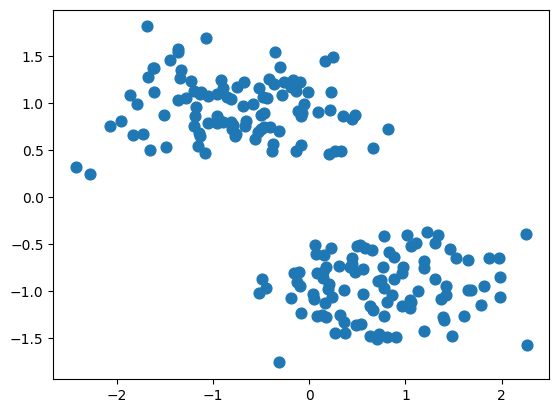

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1,
       1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1,
       1, 2], dtype=int32)

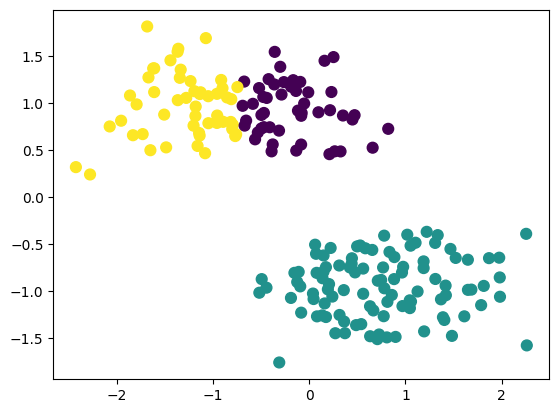

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='viridis', c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

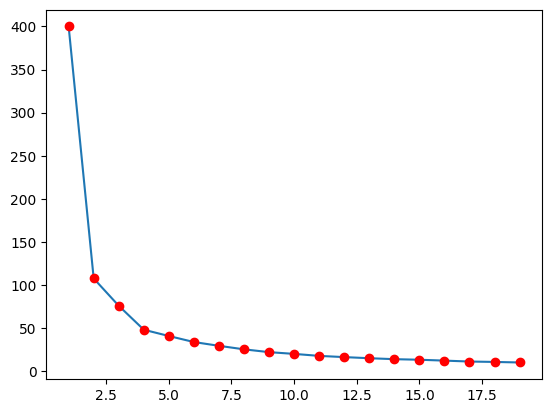

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

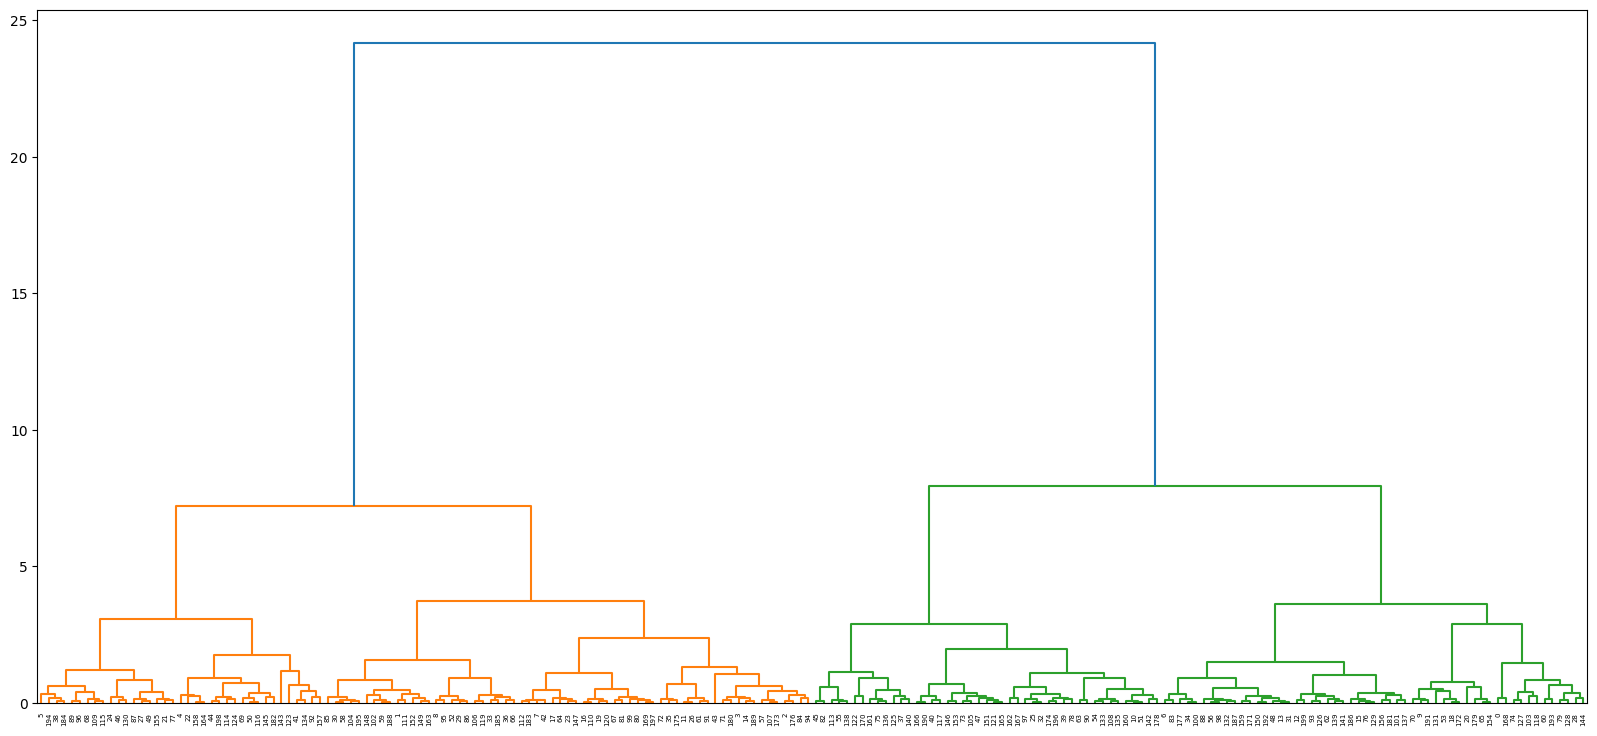

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0,
       0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0,
       0, 1])

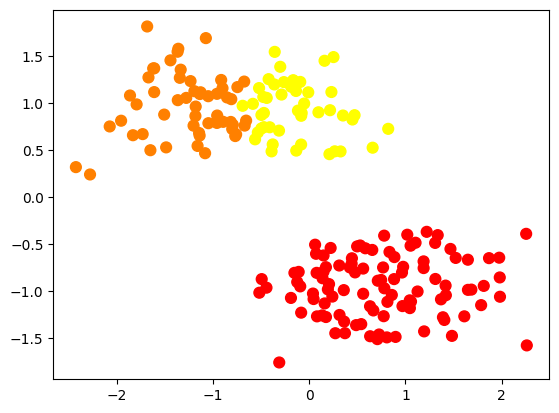

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,-8.363922,-0.555318,1
1,3.038819,-9.933911,0
2,0.059392,-9.824770,0
3,1.223927,-9.557753,0
4,4.259451,-12.770377,0
...,...,...,...
195,3.721747,-10.958984,0
196,-1.616034,6.865254,2
197,1.520939,-7.503996,0
198,5.080552,-9.955885,0
